# Assignment 3. Wine Quality Prediction

The assignment is to develop a regression model to predict wine quality score.

The dataset consists of 11 predictor variables and one target variable, `quality`. Predictor variables are listed below:

- fixed_acidity (고정 산성도)
- volatile_acidity (휘발성 산성도)
- critic_acid (구연산)
- sugar (잔당)
- chloride (염화물)
- free_sulfer_dioxide (자유 이상화황)
- total_sulfer_dioxide (총 이산화황)
- density (밀도)
- acidity (산도)
- sulfate (황산염)
- alcohol (알코올)

Can you build a machine learning model to accurately predict the quality scores of given wines?

First, let's load the data. The training and test data files are located in the same folder.
- training data: `wine_quality_train.csv` (4,000 samples)
- test data: `wine_quality_test.csv` (898 samples) 

In [1]:
import pandas as pd

df = pd.read_csv('wine_quality_train.csv')
df.head()

,fixed_acidity,volatile_acidity,critic_acid,sugar,chloride,free_sulfer_dioxide,total_sulfer_dioxide,density,acidity,sulfate,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [2]:
df.columns

Index(['fixed_acidity', 'volatile_acidity', 'critic_acid', 'sugar', 'chloride',
       'free_sulfer_dioxide', 'total_sulfer_dioxide', 'density', 'acidity',
       'sulfate', 'alcohol', 'quality'],
      dtype='object')

Define `X` and `y`. Here, `X` and `y` refers to the input and output of our classification models.

In [3]:
X = df.iloc[:, :-1] # or, df[['fixed_acidity', 'volatile_acidity', 'critic_acid', 'sugar', 'chloride','free_sulfer_dioxide', 'total_sulfer_dioxide', 'density', 'acidity', 'sulfate', 'alcohol', ]]
y = df.iloc[:, -1]  # or, df['quality']

## Problem 1. Check the average quality value

Check the average value of the wine qualitiy of the training data (`y` in the above cell).

In [8]:
# your code here
# ...

average_quality = y.mean()
print('average value of the win quality is :', round(average_quality,1))



average value of the win quality is : 5.9


## Problem 2. Train Classifiers

First, split the data into training and validation data. This is necessary to avoid overfitting.

In [9]:
from sklearn.model_selection import train_test_split

X_trn, X_val, y_trn, y_val = train_test_split(X, y, test_size=0.3, random_state=0)

Apply feature normalization so that all features are considered equal.

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_trn)

X_trn_norm = scaler.transform(X_trn)
X_val_norm = scaler.transform(X_val)

- Train decision tree,
- random forest,
- lasso regressiors
using the normalized training data.

And check the training and validation performances of the model
using the root mean squared error (RMSE) measure.

* The choice of model parameters (e.g., `max_depth` in decision tree, `n_estimators` in random forest, `alpha` (C) in lasso) is up to you :) Note that the models have their default values (e.g., `max_depth=3`, `n_estimators=100`, `alpha=1`) I recommend you to search over some parameter candidates to find a good model with low validation error!

In [11]:
# your code here
# ...
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso

from sklearn.metrics import mean_squared_error

regr_dt3 = DecisionTreeRegressor(max_depth=3)
regr_dt5 = DecisionTreeRegressor(max_depth=5)

regr_rf10= RandomForestRegressor(n_estimators=10)
regr_rf100 = RandomForestRegressor(n_estimators=100)

regr_l1_01 = Lasso(alpha=0.1) #. 베타의 절대값을 최소화
regr_l1_1 = Lasso(alpha=1)
regr_l1_10 = Lasso(alpha=10)
regr_l1_100 = Lasso(alpha=100)

for regr in [regr_dt3, regr_dt5,
             regr_rf10, regr_rf100,
             regr_l1_01, regr_l1_1, regr_l1_10, regr_l1_100]:
    regr.fit(X_trn, y_trn)
    
    y_trn_pred = regr.predict(X_trn)
    y_val_pred = regr.predict(X_val)
    
    trn_error = mean_squared_error(y_trn, y_trn_pred, squared=False) #RMSE  만약 True로 하면 MSE
    val_error = mean_squared_error(y_val, y_val_pred, squared=False)
    
    print('Model: {} | Training RMSE: {:.3f} | Validation RMSE: {:.3f}'.format(str(regr), trn_error, val_error))    

Model: DecisionTreeRegressor(max_depth=3) | Training RMSE: 0.766 | Validation RMSE: 0.781
Model: DecisionTreeRegressor(max_depth=5) | Training RMSE: 0.713 | Validation RMSE: 0.774
Model: RandomForestRegressor(n_estimators=10) | Training RMSE: 0.289 | Validation RMSE: 0.656
Model: RandomForestRegressor() | Training RMSE: 0.244 | Validation RMSE: 0.629
Model: Lasso(alpha=0.1) | Training RMSE: 0.802 | Validation RMSE: 0.805
Model: Lasso(alpha=1) | Training RMSE: 0.886 | Validation RMSE: 0.894
Model: Lasso(alpha=10) | Training RMSE: 0.908 | Validation RMSE: 0.914
Model: Lasso(alpha=100) | Training RMSE: 0.908 | Validation RMSE: 0.914


## Problem 3. Feature importance

Remember that linear regression, decision tree, and random forest provide information about which input feature is important to predict the outcome.

In our problem of wine quality prediction, which feature is important? explore the model and describe your opinion.

In [37]:
regr_dt5.feature_importances_
regr_rf100.feature_importances_
regr_l1_01.coef_

print("DecisionTree_5_feature_importances :", regr_dt5.feature_importances_)
print("RandomTree_100_feature_importances :", regr_rf100.feature_importances_)
print("Lasso1_01_Coef :",regr_l1_01.coef_)

DecisionTree_5_feature_importances : [0.02910674 0.16198927 0.01202003 0.03296747 0.00769547 0.12498285
 0.0372609  0.01964373 0.0264061  0.01081375 0.5371137 ]
RandomTree_100_feature_importances : [0.07014017 0.11764998 0.05653432 0.06301356 0.05912445 0.11525592
 0.07851546 0.06113374 0.06768404 0.06511797 0.24583039]
Lasso1_01_Coef : [-0.         -0.          0.          0.00265695 -0.          0.01002722
 -0.00271513 -0.          0.          0.          0.26485677]


array([0.06795897, 0.11706738, 0.05757126, 0.06153891, 0.06009007,
       0.11804814, 0.07453654, 0.06022947, 0.06944703, 0.06616705,
       0.2473452 ])

array([-0.        , -0.        ,  0.        ,  0.00265695, -0.        ,
        0.01002722, -0.00271513, -0.        ,  0.        ,  0.        ,
        0.26485677])

In [26]:
X.columns

Index(['fixed_acidity', 'volatile_acidity', 'critic_acid', 'sugar', 'chloride',
       'free_sulfer_dioxide', 'total_sulfer_dioxide', 'density', 'acidity',
       'sulfate', 'alcohol'],
      dtype='object')

In [27]:
for col, a, b, c in zip(X.columns, 
                        regr_dt5.feature_importances_, 
                        regr_rf100.feature_importances_, 
                        regr_l1_01.coef_):
    print('{:<15}: {:.2f}(lr),\t {:.2f}(l1),\t {:.2f}(l2)'.format(col, a, b, c))

fixed_acidity  : 0.03(lr),	 0.07(l1),	 -0.00(l2)
volatile_acidity: 0.16(lr),	 0.12(l1),	 -0.00(l2)
critic_acid    : 0.02(lr),	 0.06(l1),	 0.00(l2)
sugar          : 0.03(lr),	 0.06(l1),	 0.00(l2)
chloride       : 0.01(lr),	 0.06(l1),	 -0.00(l2)
free_sulfer_dioxide: 0.13(lr),	 0.12(l1),	 0.01(l2)
total_sulfer_dioxide: 0.04(lr),	 0.07(l1),	 -0.00(l2)
density        : 0.02(lr),	 0.06(l1),	 -0.00(l2)
acidity        : 0.03(lr),	 0.07(l1),	 0.00(l2)
sulfate        : 0.01(lr),	 0.07(l1),	 0.00(l2)
alcohol        : 0.54(lr),	 0.25(l1),	 0.26(l2)


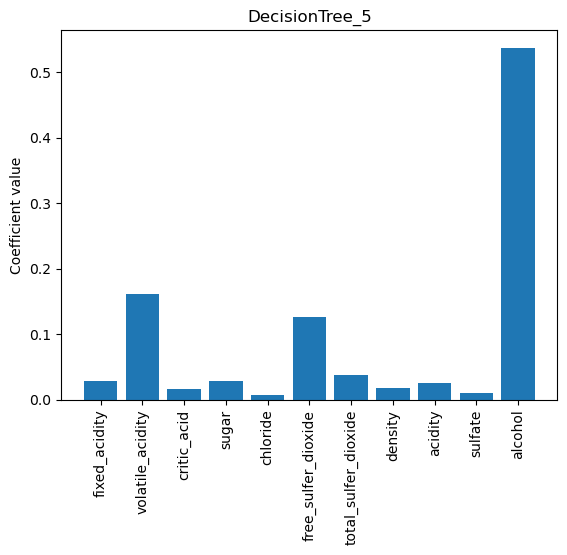

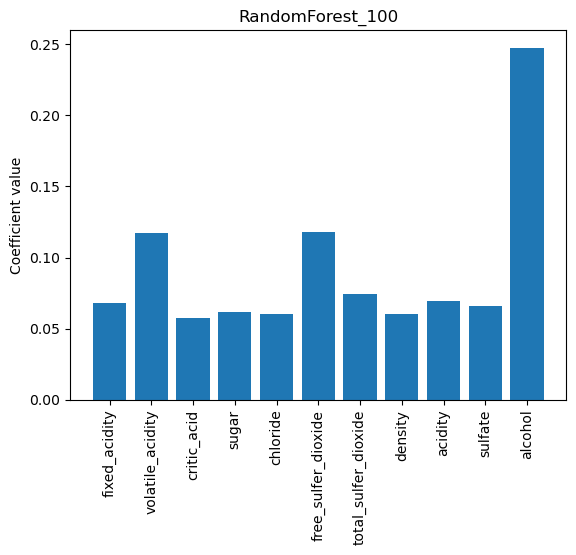

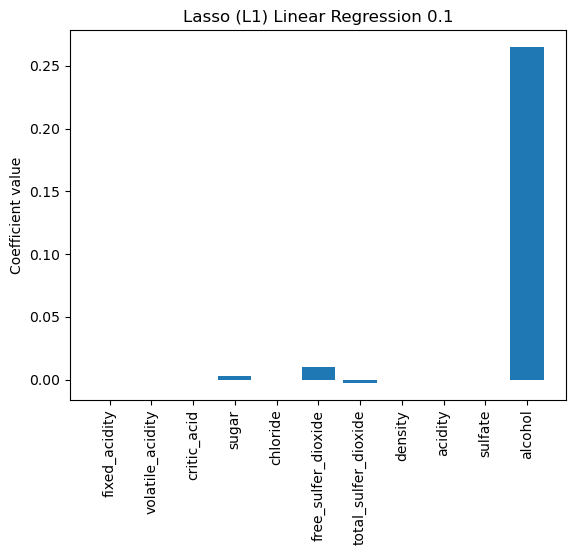

In [29]:
from matplotlib import pyplot as plt

plt.bar(X.columns, regr_dt5.feature_importances_)
plt.xticks(rotation=90)
plt.ylabel('Coefficient value')
plt.title('DecisionTree_5')
plt.show()

plt.bar(X.columns, regr_rf100.feature_importances_)
plt.xticks(rotation=90)
plt.ylabel('Coefficient value')
plt.title('RandomForest_100')
plt.show()

plt.bar(X.columns, regr_l1_01.coef_)
plt.xticks(rotation=90)
plt.ylabel('Coefficient value')
plt.title('Lasso (L1) Linear Regression 0.1')
plt.show()

## Problem 4. Check model performance on new data (test performance)

In this month, 898 new wine samples arrived in our shop, so you want to check your model performance on new samples.
The wine quality "labels (answers)" of new wines were obtained from experienced wine critics in the shop.

The test data named `wine_quality_test.csv` is located in the same forder.

In [30]:
df_test = pd.read_csv('wine_quality_test.csv')
df_test

,fixed_acidity,volatile_acidity,critic_acid,sugar,chloride,free_sulfer_dioxide,total_sulfer_dioxide,density,acidity,sulfate,alcohol,quality
0,6.4,0.24,0.49,5.8,0.053,25.0,120.0,0.99420,3.01,0.98,10.5,6
1,6.4,0.25,0.57,1.0,0.062,21.0,122.0,0.99238,3.00,0.40,9.5,5
2,6.1,0.25,0.48,15.8,0.052,25.0,94.0,0.99782,3.07,0.45,9.2,6
3,6.8,0.14,0.35,1.5,0.047,40.0,117.0,0.99111,3.07,0.72,11.1,6
4,6.5,0.38,0.26,5.2,0.042,33.0,112.0,0.99067,3.06,0.50,12.3,7
...,...,...,...,...,...,...,...,...,...,...,...,...
893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


Define `X` and `y` of test data.

In [31]:
X_tst = df_test.iloc[:, :-1]
y_tst = df_test.iloc[:, -1]

Don't forget to normalize the input data `X_tst` using `scaler` obtained from the training data!

In [33]:
X_tst_norm = scaler.transform(X_tst)

Test your regressiors on the test data and get RMSE scores of the models obtained in the Problem 2.

In [34]:
# your code here
# ...

regr_dt3 = DecisionTreeRegressor(max_depth=3)
regr_dt5 = DecisionTreeRegressor(max_depth=5)

regr_rf10= RandomForestRegressor(n_estimators=10)
regr_rf100 = RandomForestRegressor(n_estimators=100)

regr_l1_01 = Lasso(alpha=0.1) #. 베타의 절대값을 최소화
regr_l1_1 = Lasso(alpha=1)
regr_l1_10 = Lasso(alpha=10)
regr_l1_100 = Lasso(alpha=100)

for regr in [regr_dt3, regr_dt5,
             regr_rf10, regr_rf100,
             regr_l1_01, regr_l1_1, regr_l1_10, regr_l1_100]:
    regr.fit(X_trn, y_trn)
    
    y_trn_pred = regr.predict(X_trn)
    y_tst_pred = regr.predict(X_tst)
    
    trn_error = mean_squared_error(y_trn, y_trn_pred, squared=False) #RMSE  만약 True로 하면 MSE
    tst_error = mean_squared_error(y_tst, y_tst_pred, squared=False)
    
    print('Model: {} | Training RMSE: {:.3f} | Test RMSE: {:.3f}'.format(str(regr), trn_error, tst_error))    

Model: DecisionTreeRegressor(max_depth=3) | Training RMSE: 0.766 | Test RMSE: 0.683
Model: DecisionTreeRegressor(max_depth=5) | Training RMSE: 0.713 | Test RMSE: 0.671
Model: RandomForestRegressor(n_estimators=10) | Training RMSE: 0.293 | Test RMSE: 0.692
Model: RandomForestRegressor() | Training RMSE: 0.245 | Test RMSE: 0.649
Model: Lasso(alpha=0.1) | Training RMSE: 0.802 | Test RMSE: 0.726
Model: Lasso(alpha=1) | Training RMSE: 0.886 | Test RMSE: 0.751
Model: Lasso(alpha=10) | Training RMSE: 0.908 | Test RMSE: 0.768
Model: Lasso(alpha=100) | Training RMSE: 0.908 | Test RMSE: 0.768
